In [5]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
experiment_name = 'C01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [7]:
time_window = 50
time_step = 25
trial_bin_size = 20
n_splits = 30
group_dict = OrderedDict([('1 (Hashtag)',[12]),('2',[20])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [8]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
2
3
4
5
6
7
8
9
10


In [9]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1Hv1L') 
# interp.save_results()

No handles with labels found to put in legend.


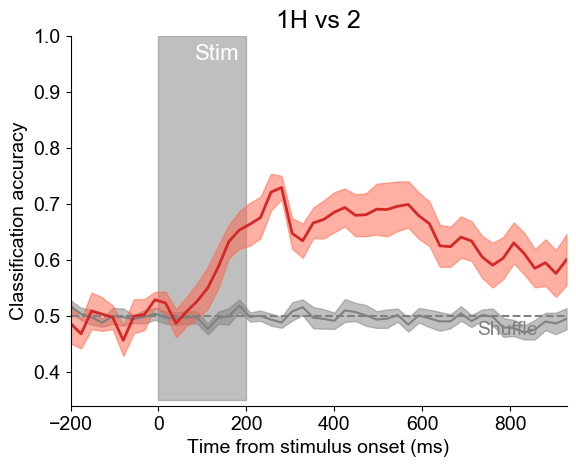

Mean delay accuracy: 0.6516129032258065
Mean delay S.D.: 0.0414937205517545


In [13]:
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.34,1],chance_text_y=.23, title='1H vs 2',stim_time=[0,200])

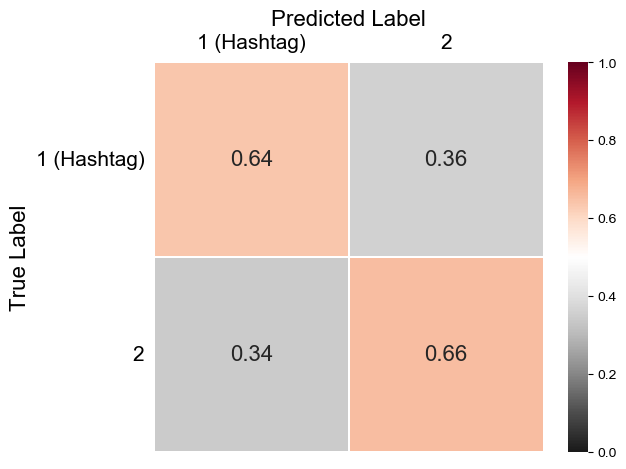

In [14]:
interp.plot_confusion_matrix()

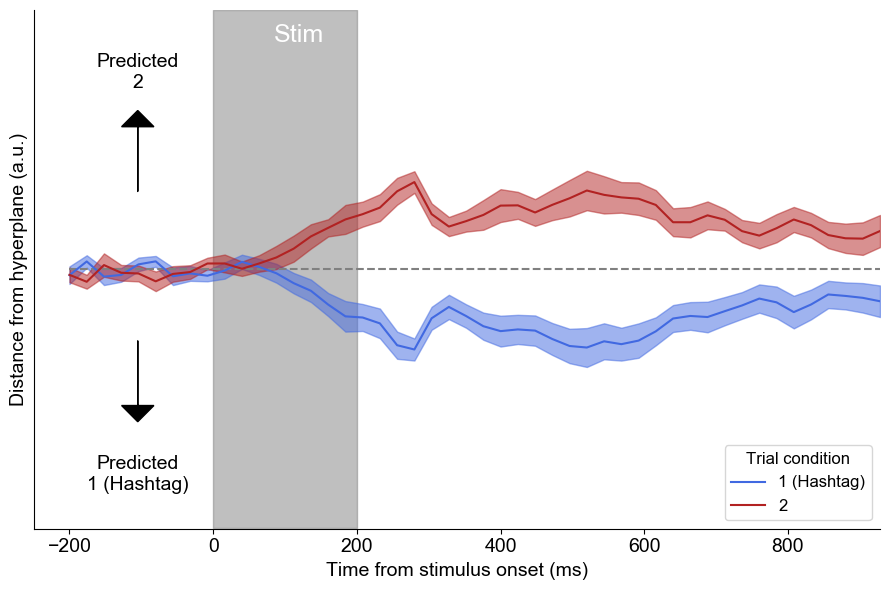

In [15]:
interp.plot_hyperplane(stim_time=[0,200], ylim=[-4,4])